In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd

iris = load_iris()

iris_data = iris.data

iris_label = iris.target

print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [3]:
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2, random_state = 11)

In [4]:
dt_clf = DecisionTreeClassifier(random_state = 11)

In [5]:
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=11)

In [6]:
pred = dt_clf.predict(x_test)

In [7]:
from sklearn.metrics import accuracy_score
print('예측 정확도 {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 0.9333


In [8]:
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state = 156)

kfold = KFold(n_splits = 5)
cv_accuracy = []
print('붖꽃 데이터 세트 크기:', features.shape[0])

붖꽃 데이터 세트 크기: 150


In [9]:
n_iter = 0

for train_index, test_index in kfold.split(features):
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(x_train, y_train)
    pred = dt_clf.predict(x_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    print(n_iter, '교차 정확도 :', accuracy, ', 학습 데이터 크기:', train_size,', 검증 데이터 크기:', test_size)
    print(n_iter, '검증 세트 인덱스 :', test_index)
    cv_accuracy.append(accuracy)

print('평균 검증 정확도 :', np.mean(cv_accuracy))

1 교차 정확도 : 1.0 , 학습 데이터 크기: 120 , 검증 데이터 크기: 30
1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
2 교차 정확도 : 0.9667 , 학습 데이터 크기: 120 , 검증 데이터 크기: 30
2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
3 교차 정확도 : 0.8667 , 학습 데이터 크기: 120 , 검증 데이터 크기: 30
3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
4 교차 정확도 : 0.9333 , 학습 데이터 크기: 120 , 검증 데이터 크기: 30
4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
5 교차 정확도 : 0.7333 , 학습 데이터 크기: 120 , 검증 데이터 크기: 30
5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
평균 검증 정확도 : 0.9


In [10]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [11]:
kfold = KFold(n_splits = 3)
n_iter = 0

for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('교차검증:',n_iter)
    print('학습 레이블분포:\n', label_train.value_counts())
    print('검증 레이블분포:\n', label_test.value_counts())

교차검증: 1
학습 레이블분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블분포:
 0    50
Name: label, dtype: int64
교차검증: 2
학습 레이블분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블분포:
 1    50
Name: label, dtype: int64
교차검증: 3
학습 레이블분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블분포:
 2    50
Name: label, dtype: int64


In [12]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('교차검증:',n_iter)
    print('학습 레이블분포:\n', label_train.value_counts())
    print('검증 레이블분포:\n', label_test.value_counts())

교차검증: 1
학습 레이블분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블분포:
 0    17
1    17
2    16
Name: label, dtype: int64
교차검증: 2
학습 레이블분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블분포:
 0    17
2    17
1    16
Name: label, dtype: int64
교차검증: 3
학습 레이블분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블분포:
 1    17
2    17
0    16
Name: label, dtype: int64


In [13]:
dt_clt =  DecisionTreeClassifier(random_state = 156)

skfold = StratifiedKFold(n_splits = 3)
n_iter = 0
cv_accuracy = []

for train_index, test_index in skfold.split(features, label):
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(x_train, y_train)
    pred = dt_clf.predict(x_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    print(n_iter, '교차 정확도 :', accuracy, ', 학습 데이터 크기:', train_size,', 검증 데이터 크기:', test_size)
    print(n_iter, '검증 세트 인덱스 :', test_index)
    cv_accuracy.append(accuracy)

print('평균 검증 정확도 :', np.mean(cv_accuracy))

1 교차 정확도 : 0.98 , 학습 데이터 크기: 100 , 검증 데이터 크기: 50
1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]
2 교차 정확도 : 0.94 , 학습 데이터 크기: 100 , 검증 데이터 크기: 50
2 검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]
3 교차 정확도 : 0.98 , 학습 데이터 크기: 100 , 검증 데이터 크기: 50
3 검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
평균 검증 정확도 : 0.9666666666666667


In [14]:
from sklearn.model_selection import cross_val_score, cross_validate

dt_clf = DecisionTreeClassifier(random_state = 156)

iris_data = load_iris()
data = iris_data.data
target = iris_data.target

scores = cross_val_score(dt_clf, data, label, scoring = 'accuracy', cv = 3)
print('교차 검증별 정확도:', scores)
print('평균 검증 정확도:', np.mean(scores))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9666666666666667


In [15]:
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size= 0.2, random_state=121)

dtree = DecisionTreeClassifier()

parameters = {'max_depth':[1,2,3],'min_samples_split':[2,3]}

In [16]:
import pandas as pd

grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv = 3, refit = True)

grid_dtree.fit(x_train, y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score',
           'split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [17]:
print('최적 파라미터:',grid_dtree.best_params_)
print('최고 정확도:', format(grid_dtree.best_score_))

최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
최고 정확도: 0.975


In [18]:
estimator = grid_dtree.best_estimator_

pred = estimator.predict(x_test)
print('테스트 데이터 세트 정확도:', accuracy_score(y_test, pred))

테스트 데이터 세트 정확도: 0.9666666666666667


In [19]:
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고', '전자레인지','컴퓨터']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 2 3]


In [20]:
print(encoder.classes_)

['TV' '냉장고' '전자레인지' '컴퓨터']


In [21]:
print(encoder.inverse_transform([3,2,0,3,2,1,1,2,3,0,0,2]))

['컴퓨터' '전자레인지' 'TV' '컴퓨터' '전자레인지' '냉장고' '냉장고' '전자레인지' '컴퓨터' 'TV' 'TV'
 '전자레인지']


In [22]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV','냉장고', '전자레인지','컴퓨터']

encoder = LabelEncoder()
encoder.fit(items)

labels = labels.reshape(-1,1)

oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('데이터')
print(oh_labels.toarray()) # 리스트를 배열로 변경
print(oh_labels.shape)

데이터
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
(4, 4)


In [23]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data

iris_df = pd.DataFrame(data=iris_data,columns = iris.feature_names)
print('평균값')
print(iris_df.mean())
print('\n분산값')
print(iris_df.var())

평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

분산값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns = iris.feature_names)
print('평균값')
print(iris_df_scaled.mean())
print('\n분산값')
print(iris_df_scaled.var())

평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns = iris.feature_names)
print('최솟값')
print(iris_df_scaled.min())
print('\n최댓값')
print(iris_df_scaled.max())

최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [26]:
## 타이타닉 생존자 예측 모델

In [27]:
import seaborn as sns

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [29]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [30]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('null값 개수', titanic_df.isnull().sum().sum())

null값 개수 0


In [31]:
print('sex 값 분포\n', titanic_df['Sex'].value_counts())
print('\nCabin 값 분포\n', titanic_df['Cabin'].value_counts())
print('\nEmbarked 값 분포\n', titanic_df['Embarked'].value_counts())

sex 값 분포
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포
 N              687
G6               4
C23 C25 C27      4
B96 B98          4
D                3
              ... 
A19              1
D37              1
C101             1
C82              1
C99              1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [32]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [33]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

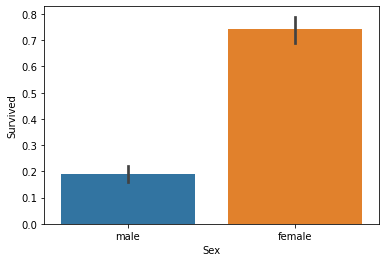

In [34]:
sns.barplot(x = 'Sex', y = 'Survived', data= titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

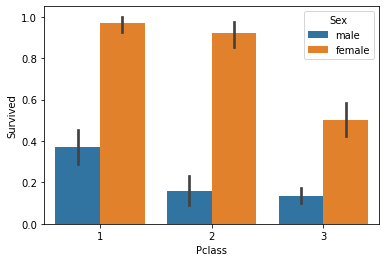

In [35]:
sns.barplot(x='Pclass', y= 'Survived', hue = 'Sex', data=titanic_df)

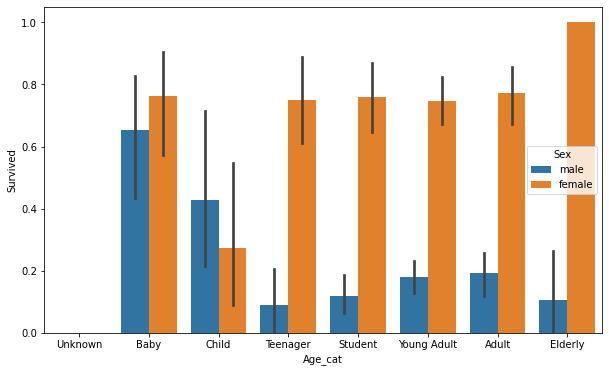

In [38]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

plt.figure(figsize=(10,6))

group_names = ['Unknown', 'Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data=titanic_df, order = group_names)
titanic_df.drop('Age_cat',axis = 1, inplace= True)

In [41]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [48]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df

def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [49]:
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis = 1)

x_titanic_df = transform_features(x_titanic_df)

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [52]:
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
print('DecisionTreeClassifier 정확도:', accuracy_score(y_test, dt_pred))

rf_clf.fit(x_train, y_train)
dt_pred = rf_clf.predict(x_test)
print('RandomForestClassifier 정확도:', accuracy_score(y_test, dt_pred))

lr_clf.fit(x_train, y_train)
dt_pred = lr_clf.predict(x_test)
print('LogisticRegression 정확도:', accuracy_score(y_test, dt_pred))

DecisionTreeClassifier 정확도: 0.7877094972067039
RandomForestClassifier 정확도: 0.8547486033519553
LogisticRegression 정확도: 0.8491620111731844


C:\ProgramData\Anaconda3\envs\ssu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clt, x_titanic_df, y_titanic_df, cv= 5)

for iter_count, accuracy in enumerate(scores):
    print('교차검증', iter_count, '정확도:', accuracy)
    
print('평균정확도:', np.mean(scores))

교차검증 0 정확도: 0.7486033519553073
교차검증 1 정확도: 0.7696629213483146
교차검증 2 정확도: 0.797752808988764
교차검증 3 정확도: 0.7808988764044944
교차검증 4 정확도: 0.8202247191011236
평균정확도: 0.7834285355596008


In [56]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
              'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(x_train, y_train)

print('GridSearchCV 최적 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도:', grid_dclf.best_score_)
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도:', accuracy)

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7991825076332119
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715083798882681
